In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('carcrash_fe')
df.head(2) 

,id,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,...,crash_day_of_week,crash_month,latitude,longitude,crash_year,crash_day,year_notified,month_notified,day_notified,hour_notified
0,280396,30,3,2,2,3,9,3,1,2,...,3,11,41.940958,-87.649185,2019,26,2019,11,26,18
1,406594,30,1,1,2,1,11,5,1,2,...,1,10,41.851498,-87.735394,2018,28,2018,10,28,16


,id,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,...,crash_day_of_week,crash_month,latitude,longitude,crash_year,crash_day,year_notified,month_notified,day_notified,hour_notified
count,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,...,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.00000,9622.000000
mean,230150.067554,28.224693,1.678030,1.531802,1.418312,1.619933,3.275930,2.643941,1.044066,1.400021,...,4.135003,6.858553,41.858899,-87.679049,2018.170755,15.727292,2018.172833,6.856059,15.67117,13.861152
std,132584.219207,6.421920,1.113763,0.755520,1.017429,1.120766,2.355135,2.331175,0.318719,0.844981,...,1.984652,3.396142,0.086589,0.059436,1.320662,8.806247,1.320313,3.396282,8.79592,5.149955
min,43.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,41.644694,-87.914197,2015.000000,1.000000,2015.000000,1.000000,1.00000,0.000000
25%,115964.250000,30.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,4.000000,41.783296,-87.722238,2017.000000,8.000000,2017.000000,4.000000,8.00000,11.000000
50%,230000.000000,30.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,4.000000,7.000000,41.876748,-87.673643,2018.000000,16.000000,2018.000000,7.000000,16.00000,15.000000
75%,343469.750000,30.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.000000,...,6.000000,10.000000,41.925294,-87.633436,2019.000000,23.000000,2019.000000,10.000000,23.00000,18.000000
max,460917.000000,65.000000,16.000000,7.000000,11.000000,6.000000,17.000000,19.000000,6.000000,7.000000,...,7.000000,12.000000,42.022551,-87.524587,2020.000000,31.000000,2020.000000,12.000000,31.00000,23.000000


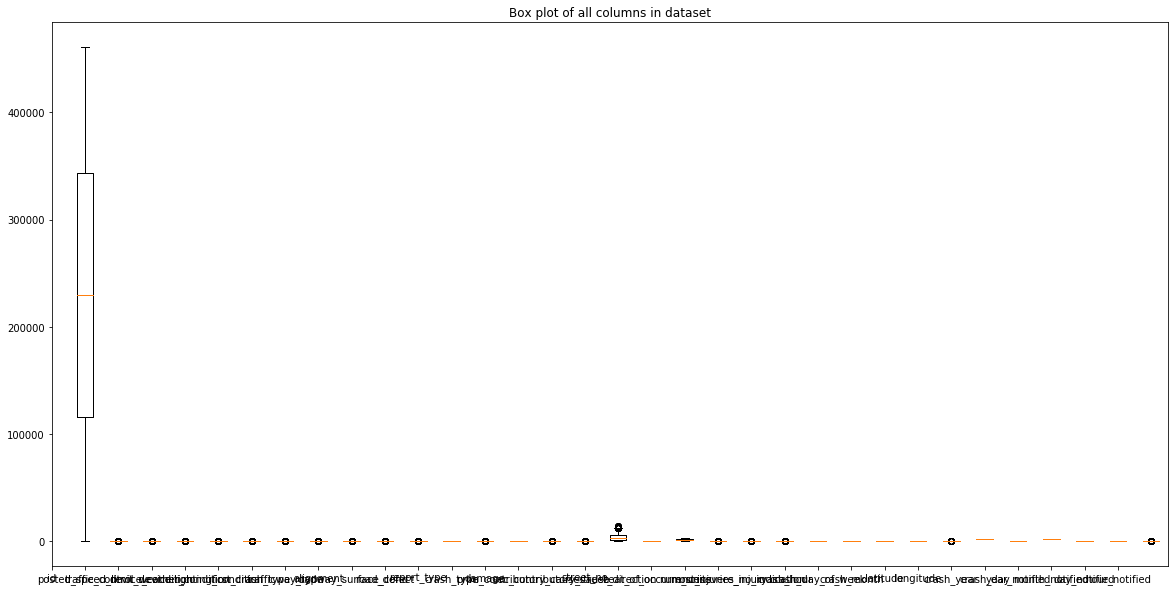

In [7]:
# Explore the dataset
display(df.describe()) 

#### Preprocessing

In [8]:
y = df['damage']
X = df.drop('damage', axis=1)
X.head()

,id,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,...,crash_day_of_week,crash_month,latitude,longitude,crash_year,crash_day,year_notified,month_notified,day_notified,hour_notified
0,280396,30,3,2,2,3,9,3,1,2,...,3,11,41.940958,-87.649185,2019,26,2019,11,26,18
1,406594,30,1,1,2,1,11,5,1,2,...,1,10,41.851498,-87.735394,2018,28,2018,10,28,16
2,384302,25,1,1,1,1,3,2,1,1,...,1,8,41.793598,-87.693942,2017,13,2017,8,13,18
3,148689,30,1,1,1,1,5,4,1,1,...,6,3,41.851989,-87.685492,2017,24,2017,3,24,16
4,154004,30,2,2,1,1,4,2,1,1,...,5,1,41.802023,-87.616272,2020,2,2020,1,2,13


#### Training, testing, and cross-validation

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Create a baseline model: Decision Trees

In [11]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)
print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 56.17%


#### The model has Mean Cross Validation Score: 56.17% , but still significantly better than we would expect from random guessing.

### Grid search: Decision trees

In [12]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

#### Number of permutation 

In [13]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


#### Instantiate GridSearchCV & fit the data

In [14]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

### Checking the best parameter

In [15]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 66.45%
Mean Test Score: 61.93%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [16]:
mean_dt_cv_score = np.mean(dt_cv_score)
print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 56.17%


### Model: Random forests

In [18]:
import warnings 
warnings.filterwarnings("ignore")
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}") 

Mean Cross Validation Score for Random Forest Classifier: 59.06%


In [19]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
} 

In [20]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}") 

Training Accuracy: 61.96%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}


#### Comparison

In [21]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.6192851205320034
Random forest grid search:  0.6305070656691605
